# Basic image processing


In an image processing context, the histogram of an image normally refers to a histogram of the pixel intensity values. This histogram is a graph showing the number of pixels in an image at each different intensity value found in that image. For an 8-bit grayscale image there are 256 different possible intensities, and so the histogram will graphically display 256 numbers showing the distribution of pixels amongst those grayscale values. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave, imread,imshow
#Import your function here
from histogramEqualize import histeq
from histogram import imhist


First we load images for this example

Image shape (500, 500)


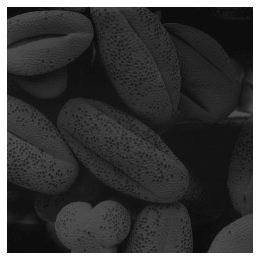

In [3]:
img=imread('images/Q2_1_2.tif',as_gray=True)
print("Image shape",img.shape)
m, n = img.shape
imshow(img)
plt.axis('off')  # Turn of axis numbers and ticks
plt.show()

Once the image is properly loaded, lets find the histogram of the image.
The algorithm to parametrize the binning of the histogram is:


define bin width<br>
For each value read from the image<br>
  &emsp;   value belong to [min,max] interval ? <br>
 &emsp;  &emsp;    if yes find in which bin and increment bin<br>
 &emsp;      else <br>
  &emsp;&emsp;           return<br>
  &emsp;     end<br>
end<br>

In [4]:
imagehist=imhist(img)

The Normalized histogram estimated by deviding the histogram to the total number of pixels in the image

In [5]:
histNorm=imagehist/(m*n)

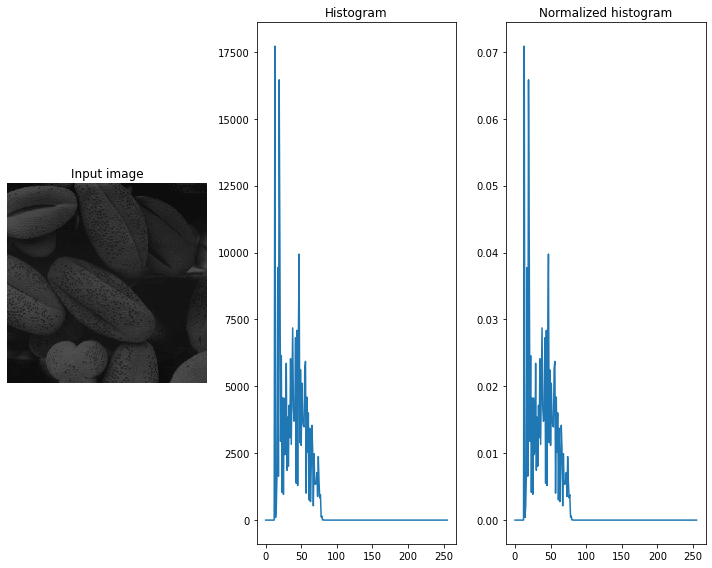

In [6]:
plt.figure(figsize=(10, 8))
ax=plt.subplot(131)
imshow(img)
ax.set_title("Input image")
plt.axis('off')
ax=plt.subplot(132)
ax.plot(imagehist)
plt.axis('on')
ax.set_title("Histogram")
ax=plt.subplot(133)
ax.plot(histNorm)
ax.set_title("Normalized histogram")
ax.axis('on')
plt.tight_layout()
plt.show()

Now lets histogram equalize the image

In [7]:
OutputImage,NormalizedHist, Outhist, TransferFunction=histeq(img)

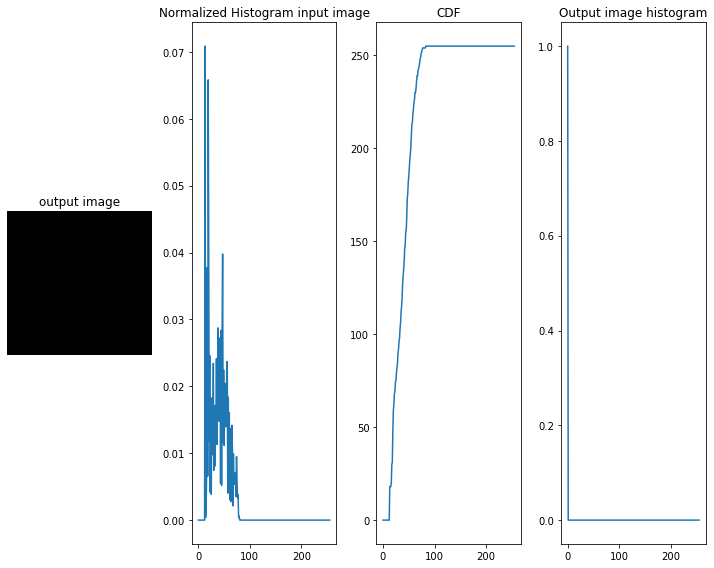

In [8]:
plt.figure(figsize=(10, 8))
ax=plt.subplot(141)
imshow(OutputImage)
ax.set_title("output image")
plt.axis('off')
ax=plt.subplot(142)
ax.plot(NormalizedHist)
ax.axis('on')
ax.set_title("Normalized Histogram input image")
ax=plt.subplot(143)
ax.plot(TransferFunction)
ax.set_title("CDF")
ax=plt.subplot(144)
ax.plot(Outhist)
ax.set_title("Output image histogram")
ax.axis('on')
plt.tight_layout()
plt.show()

The Expected output is <br>
![out1](./Images/Output.png)

# Rescale and resize

Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis. <br>
Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.
<br>

For this we will use opencv function, resize. 
<br>

To intall opencv:<br>
&emsp; pip install opencv-contrib-python 

In [12]:
import cv2

In [13]:
imghalf=cv2.resize(OutputImage,(m//2,n//2),interpolation=cv2.INTER_CUBIC)
imgquart=cv2.resize(OutputImage,(m//4,n//4),interpolation=cv2.INTER_CUBIC)
img8th=cv2.resize(OutputImage,(m//8,n//8),interpolation=cv2.INTER_CUBIC)

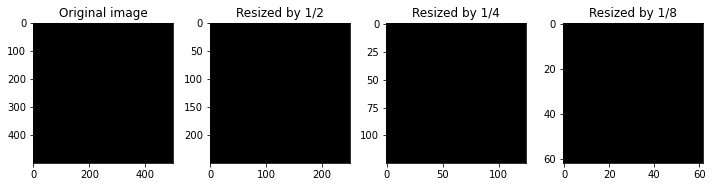

In [14]:
plt.figure(figsize=(10, 8))
ax=plt.subplot(141)
imshow(OutputImage)
ax.set_title("Original image")
plt.axis('on')
ax=plt.subplot(142)
imshow(imghalf)
ax.axis('on')
ax.set_title("Resized by 1/2")
ax=plt.subplot(143)
imshow(imgquart)
ax.set_title("Resized by 1/4")
ax=plt.subplot(144)
imshow(img8th)
ax.set_title("Resized by 1/8")
ax.axis('on')
plt.tight_layout()
plt.show()

The Expected output is <br>
![out1](./Images/out2.png)